In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plots_dir = './plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data/processed/terran_285_jan-21-2021_224018.csv', header=0, index_col=False)

nan_columns = df.select_dtypes(include=['object']).columns
print('Nan columns:', nan_columns)

Nan columns: Index(['map_name', 'region', 'race', 'enemy_race', 'player'], dtype='object')


In [3]:
drop_cols = list(nan_columns.difference(['map_name','region','race','enemy_race'])) + [df.columns[0], 'match_id']
print('Dropping:', drop_cols)

df.drop(columns=drop_cols, inplace=True)

Dropping: ['player', 'Unnamed: 0', 'match_id']


In [4]:
df.describe()

,game_length,ap30s,frame,second,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine
count,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.0,9946.000000
mean,866.849889,148.353971,9494.685904,593.415443,41.977478,84.057410,103.096119,287.917957,1710.044339,734.084054,7594.932636,1778.280213,2979.769455,275.285240,506.720792,216.911321,1246.775085,770.764629,820.194148,0.487533,0.008546,0.086769,2.756686,1.010456,1.239694,0.160768,0.152825,1.082948,0.342550,0.845566,1.331993,0.328273,0.794390,0.144380,0.332697,0.129901,1.329680,0.432033,1.981701,10.637342,1.632717,1.224211,1.134526,0.019103,1.442590,0.375528,0.148904,0.056203,0.276091,3.818218,41.977478,0.262819,1.487332,0.989745,0.661371,0.132616,8.017595,0.088076,0.178162,0.915544,0.0,0.715966
std,317.329575,49.640657,6961.356151,435.086704,21.288837,58.314147,74.362461,340.702895,827.709175,453.684487,5497.662087,1841.143787,5208.510034,349.333152,373.295240,224.538914,1417.363095,953.077744,1710.305771,0.676470,0.125355,0.392247,2.550824,1.392175,1.477656,0.826651,0.424454,0.348605,1.599709,0.895483,1.503332,0.624551,1.074525,0.366066,1.598645,0.438032,2.953162,1.517339,4.534463,13.727869,2.663145,2.515912,1.317478,0.177228,1.203553,0.794425,0.446479,0.378080,0.762617,2.742646,21.288837,0.658394,2.584692,0.981526,0.786097,0.526433,6.184038,0.376649,0.982107,2.785531,0.0,1.955786
min,64.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,622.000000,130.200000,3840.000000,240.000000,22.000000,27.000000,31.000000,90.000000,979.000000,400.000000,2500.000000,100.000000,0.000000,64.000000,179.000000,50.000000,150.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,821.000000,152.600000,8160.000000,510.000000,41.000000,72.000000,86.000000,185.000000,1763.000000,700.000000,6350.000000,1150.000

In [5]:
# check if all values are actually valid
na_series = df.isna().sum()
na_series = na_series[na_series > 0]

if len(na_series) == 0:
    print('Nothing to see here...')
else:
    pd.DataFrame(na_series).T

Nothing to see here...


In [6]:
df.columns

Index(['map_name', 'region', 'game_length', 'race', 'enemy_race', 'ap30s',
       'frame', 'second', 'workers_active_count', 'food_used', 'food_made',
       'minerals_current', 'minerals_collection_rate',
       'minerals_used_in_progress', 'minerals_used_current',
       'minerals_used_active_forces', 'minerals_lost', 'vespene_current',
       'vespene_collection_rate', 'vespene_used_in_progress',
       'vespene_used_current', 'vespene_used_active_forces', 'vespene_lost',
       'armory', 'autoturret', 'banshee', 'barracks', 'barrackstechlab',
       'barracksreactor', 'battlecruiser', 'bunker', 'commandcenter',
       'cyclone', 'engineeringbay', 'factory', 'factoryreactor',
       'factorytechlab', 'fusioncore', 'ghost', 'ghostacademy', 'hellion',
       'liberator', 'marauder', 'marine', 'medivac', 'missileturret', 'mule',
       'nuke', 'orbitalcommand', 'planetaryfortress', 'raven', 'reactor',
       'reaper', 'refinery', 'scv', 'sensortower', 'siegetank', 'starport',
       's

In [7]:
show_cols = [
    'second', 'workers_active_count', 'food_used', 'food_made',
    'minerals_current', 'minerals_collection_rate',
    'minerals_used_in_progress', 'minerals_used_current',
    'minerals_used_active_forces', 'minerals_lost', 'vespene_current',
    'vespene_collection_rate', 'vespene_used_in_progress',
    'vespene_used_current', 'vespene_used_active_forces', 'vespene_lost'
]


show_cols_minerals = list(filter(lambda x: 'vespene' not in x, show_cols))
show_cols_vespene = list(filter(lambda x: 'minerals' not in x, show_cols))

print(show_cols_minerals)
print(show_cols_vespene)

['second', 'workers_active_count', 'food_used', 'food_made', 'minerals_current', 'minerals_collection_rate', 'minerals_used_in_progress', 'minerals_used_current', 'minerals_used_active_forces', 'minerals_lost']
['second', 'workers_active_count', 'food_used', 'food_made', 'vespene_current', 'vespene_collection_rate', 'vespene_used_in_progress', 'vespene_used_current', 'vespene_used_active_forces', 'vespene_lost']


In [10]:
fig = sns.pairplot(df.loc[:, show_cols_minerals], hue='second').fig
plt.close(fig) # please don't show this massive plot
fig.savefig('./plots/large_pair_grid_minerals.png')

In [9]:
fig = sns.pairplot(df.loc[:, show_cols_vespene], hue='second').fig
plt.close(fig) # please don't show this massive plot
fig.savefig('./plots/large_pair_grid_vespene.png')

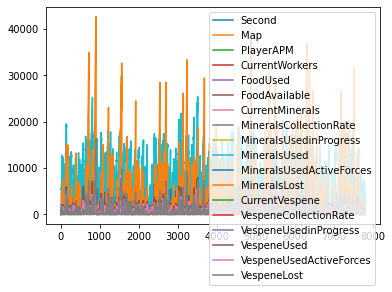

In [3]:
# Some visualization of our data set

df.loc[:,"Second":"VespeneLost"].plot()
plt.show()

In [29]:
#Normalization

from sklearn.preprocessing import MinMaxScaler

no_normalize = ['win','race','enemy_race','map_name']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(df) if x not in no_normalize]

#Normalizing these columns
norm = df[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
terran_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=df.index)

# One-hot Encoding the categorical variables
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(df['map_name'], prefix='map_name'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(df['win'], prefix='win'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(df['enemy_race'], prefix='enemy_race'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(df['race'], prefix='race'))

In [30]:
#Printing the Normalized Columns
display(terran_data_normalized)

,Second,PlayerAPM,CurrentWorkers,FoodUsed,FoodAvailable,CurrentMinerals,MineralsCollectionRate,MineralsUsedinProgress,MineralsUsed,MineralsUsedActiveForces,...,Map_5,Map_6,Map_7,Map_8,Result_Loss,Result_Win,Opponent_Protoss,Opponent_Terran,Opponent_Zerg,Race_T
0,0.000000,0.000000,0.130435,0.030928,0.000000,0.012553,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,1,0,0,1
1,0.011111,0.251799,0.141304,0.041237,0.000000,0.012553,0.154135,0.046154,0.002047,0.000000,...,0,0,0,0,0,1,1,0,0,1
2,0.022222,0.597122,0.163043,0.051546,0.023055,0.018830,0.172657,0.061538,0.010235,0.000000,...,0,0,0,0,0,1,1,0,0,1
3,0.033333,0.485612,0.184783,0.056701,0.023055,0.059001,0.178831,0.069231,0.014330,0.000000,...,0,0,0,0,0,1,1,0,0,1
4,0.044444,0.395683,0.195652,0.067010,0.023055,0.100427,0.166483,0.061538,0.019447,0.000000,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,0.144444,0.352518,0.260870,0.206186,0.115274,0.038664,0.197354,0.115385,0.112590,0.101911,...,0,0,0,0,0,1,1,0,0,1
7797,0.155556,0.366906,0.260870,0.211340,0.115274,0.023349,0.203528,0.100000,0.117707,0.092357,...,0,0,0,0,0,1,1,0,0,1
7798,0.166667,0.392086,0.271739,0.237113,0.115274,0.026613,0.259096,0.092308,0.131013,0.127389,...,0,0,0,0,0,1,1,0,0,1
7799,0.177778,0.323741,0.271739,0.252577,0.138329,0.027366,0.283793,0.138462,0.134084,0.124204,...,0,0,0,0,0,1,1,0,0,1


In [31]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['win','race','enemy_race','map_name']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(df) if x not in no_standardize]

#Standardizing these columns
stand = df[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
terran_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=df.index)

#One-hot Encoding the categorical variables
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(df['map_name'], prefix='map_name'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(df['win'], prefix='win'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(df['enemy_race'], prefix='enemy_race'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(df['race'], prefix='race'))

In [32]:
#Printing the Standardized Columns
display(terran_data_standardized)

,Second,PlayerAPM,CurrentWorkers,FoodUsed,FoodAvailable,CurrentMinerals,MineralsCollectionRate,MineralsUsedinProgress,MineralsUsed,MineralsUsedActiveForces,...,Map_5,Map_6,Map_7,Map_8,Result_Loss,Result_Win,Opponent_Protoss,Opponent_Terran,Opponent_Zerg,Race_T
0,-1.312058,-3.171456,-1.414724,-1.197331,-1.180738,-0.671313,-2.058295,-1.708980,-1.191766,-0.951290,...,0,0,0,0,0,1,1,0,0,1
1,-1.245474,-1.069776,-1.365906,-1.164082,-1.180738,-0.671313,-1.204026,-1.340282,-1.182525,-0.951290,...,0,0,0,0,0,1,1,0,0,1
2,-1.178891,1.812528,-1.268270,-1.130833,-1.071040,-0.596718,-1.101367,-1.217383,-1.145558,-0.951290,...,0,0,0,0,0,1,1,0,0,1
3,-1.112307,0.881784,-1.170634,-1.114208,-1.071040,-0.119313,-1.067147,-1.155933,-1.127075,-0.951290,...,0,0,0,0,0,1,1,0,0,1
4,-1.045724,0.131184,-1.121816,-1.080959,-1.071040,0.373011,-1.135586,-1.217383,-1.103970,-0.951290,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,-0.446471,-0.229104,-0.828907,-0.632095,-0.632248,-0.360999,-0.964488,-0.787235,-0.683473,-0.524151,...,0,0,0,0,0,1,1,0,0,1
7797,-0.379888,-0.109008,-0.828907,-0.615470,-0.632248,-0.543010,-0.930268,-0.910134,-0.660369,-0.564196,...,0,0,0,0,0,1,1,0,0,1
7798,-0.313304,0.101160,-0.780089,-0.532347,-0.632248,-0.504221,-0.622291,-0.971584,-0.600298,-0.417367,...,0,0,0,0,0,1,1,0,0,1
7799,-0.246720,-0.469296,-0.780089,-0.482473,-0.522550,-0.495270,-0.485413,-0.602886,-0.586436,-0.430715,...,0,0,0,0,0,1,1,0,0,1


In [33]:
#Printing the Standardized mean and std, should be mean=0 and std=1

print('Standardized Mean: ', stand_scaled.mean(axis=0))
print('Standardized Standard Deviation: ', stand_scaled.std(axis=0))

Standardized Mean:  [-9.01727097e-17 -5.10067853e-17 -1.54842027e-16  8.92618743e-17
 -4.64526080e-17  3.64334181e-17  9.47268870e-17  1.37536153e-16
  3.09684054e-17  3.91659244e-17 -1.82167090e-17 -2.18600508e-17
 -3.82550890e-17  2.09492154e-17  9.74593933e-17  1.27516963e-17
  9.10835452e-18 -1.36625318e-17 -1.82167090e-17  5.82934689e-17
  3.46117472e-17 -8.74402033e-17  0.00000000e+00 -5.46501271e-18
 -7.28668361e-17  1.78523749e-16  7.28668361e-18  2.36817217e-17
  1.12943596e-16 -1.45733672e-17  0.00000000e+00 -1.02013571e-16
  1.63950381e-17 -4.00767599e-17  1.09300254e-17 -1.45733672e-17
  2.91467344e-17 -4.00767599e-17  3.27900763e-17 -7.65101779e-17
 -3.27900763e-17 -7.28668361e-18  4.73634435e-17 -5.82934689e-17
 -5.10067853e-17 -1.45733672e-17  2.18600508e-17  1.27516963e-17
 -1.54842027e-16  5.28284562e-17  4.37201017e-17  4.37201017e-17
  5.82934689e-17 -8.01535197e-17 -9.10835452e-18 -1.45733672e-17
 -5.46501271e-17  2.55033926e-17  0.00000000e+00  2.18600508e-17]
Stan

In [34]:
#Standardize and then Normalize

#Normalizing the previously Standardized Columns
standnorm = terran_data_standardized[normalize_columns].values
standnorm_scaled = MinMaxScaler().fit_transform(standnorm)
terran_data_standnorm = pd.DataFrame(standnorm_scaled, columns=normalize_columns, index=terran_data_standardized.index)

#One-hot Encoding the categorical variables
terran_data_standnorm = terran_data_standnorm.join(pd.get_dummies(df['map_name'], prefix='map_name'))
terran_data_standnorm = terran_data_standnorm.join(pd.get_dummies(df['win'], prefix='win'))
terran_data_standnorm = terran_data_standnorm.join(pd.get_dummies(df['enemy_race'], prefix='enemy_race'))
terran_data_standnorm = terran_data_standnorm.join(pd.get_dummies(df['race'], prefix='race'))

In [35]:
#Printing the Standardized and then Normalized Columns
display(terran_data_standnorm)

,Second,PlayerAPM,CurrentWorkers,FoodUsed,FoodAvailable,CurrentMinerals,MineralsCollectionRate,MineralsUsedinProgress,MineralsUsed,MineralsUsedActiveForces,...,Map_5,Map_6,Map_7,Map_8,Result_Loss,Result_Win,Opponent_Protoss,Opponent_Terran,Opponent_Zerg,Race_T
0,0.000000,0.000000,0.130435,0.030928,0.000000,0.012553,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,1,0,0,1
1,0.011111,0.251799,0.141304,0.041237,0.000000,0.012553,0.154135,0.046154,0.002047,0.000000,...,0,0,0,0,0,1,1,0,0,1
2,0.022222,0.597122,0.163043,0.051546,0.023055,0.018830,0.172657,0.061538,0.010235,0.000000,...,0,0,0,0,0,1,1,0,0,1
3,0.033333,0.485612,0.184783,0.056701,0.023055,0.059001,0.178831,0.069231,0.014330,0.000000,...,0,0,0,0,0,1,1,0,0,1
4,0.044444,0.395683,0.195652,0.067010,0.023055,0.100427,0.166483,0.061538,0.019447,0.000000,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,0.144444,0.352518,0.260870,0.206186,0.115274,0.038664,0.197354,0.115385,0.112590,0.101911,...,0,0,0,0,0,1,1,0,0,1
7797,0.155556,0.366906,0.260870,0.211340,0.115274,0.023349,0.203528,0.100000,0.117707,0.092357,...,0,0,0,0,0,1,1,0,0,1
7798,0.166667,0.392086,0.271739,0.237113,0.115274,0.026613,0.259096,0.092308,0.131013,0.127389,...,0,0,0,0,0,1,1,0,0,1
7799,0.177778,0.323741,0.271739,0.252577,0.138329,0.027366,0.283793,0.138462,0.134084,0.124204,...,0,0,0,0,0,1,1,0,0,1


In [36]:
#Printing the Standardized and Normalized mean and std

print('Standardized Mean: ', standnorm_scaled.mean(axis=0))
print('Standardized Standard Deviation: ', standnorm_scaled.std(axis=0))

Standardized Mean:  [0.21894914 0.3799665  0.44542924 0.40217353 0.24815041 0.06904022
 0.37137503 0.21393115 0.26398251 0.22696788 0.07385913 0.07285501
 0.26538066 0.12635346 0.14345601 0.12479023 0.0482092  0.20497372
 0.00081186 0.01609261 0.27389651 0.1679455  0.19955775 0.00393112
 0.03127804 0.02089476 0.01599282 0.4625689  0.14674401 0.15510832
 0.11575439 0.09934624 0.01165716 0.02452677 0.04171773 0.02293662
 0.07835637 0.15787006 0.11799769 0.04043976 0.10151263 0.00247831
 0.24964036 0.05686084 0.01807461 0.25993462 0.02690797 0.25837347
 0.44542924 0.06078708 0.06647296 0.15275819 0.11749776 0.04905354
 0.38847278 0.01117073 0.0057044  0.03732427 0.         0.05618566]
Standardized Standard Deviation:  [0.16687459 0.11980824 0.22265428 0.31006098 0.21016544 0.08414387
 0.1804285  0.12518058 0.22150524 0.2385896  0.13973406 0.09732685
 0.19048428 0.1223955  0.15731844 0.14893242 0.10083641 0.2630389
 0.02166486 0.07041364 0.23534229 0.21083438 0.217073   0.04028043
 0.09918